In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

# change current working directory to the root of the project
import os
os.chdir(os.path.dirname(os.getcwd()))

# Purpose
- Purpose of this notebook is to load raw data and preprocess

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_pacf

from IPython.display import display

In [3]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

/var/folders/rx/jl4f7yr95xd03cgb4sg2w99h0000gn/T/ipykernel_1847/4075833985.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Load Data

In [4]:
nrows = None
# import txt data
data = pd.read_fwf('data/raw//WISDM_ar_v1.1_raw.txt', nrows=nrows, header=None)

print(f'{data.shape=}')
display(data.head())

data.shape=(1098204, 1)


,0
0,"33,Jogging,49105962326000,-0.6946377,12.680544..."
1,"33,Jogging,49106062271000,5.012288,11.264028,0..."
2,"33,Jogging,49106112167000,4.903325,10.882658,-..."
3,"33,Jogging,49106222305000,-0.61291564,18.49643..."
4,"33,Jogging,49106332290000,-1.1849703,12.108489..."


In [5]:
data.loc[0,0]

'33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;'

In [6]:
# separate values separate by ',' and assign column names
data = data[0].str.split(',', expand=True)
display(data.head())

,0,1,2,3,4,5,6,7,8,9,10
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;,None,None,None,None,None
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;,None,None,None,None,None
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;,None,None,None,None,None
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172;,None,None,None,None,None
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164;,None,None,None,None,None


In [7]:
# drop last 5 columns
data.drop(data.columns[[-1,-2,-3,-4,-5]], axis=1, inplace=True)
# rename columns
data.columns = ['user_id', 'activity', 'timestamp', 'x', 'y', 'z']
# remove ; from z column
data['z'] = data['z'].str.replace(';', '')

display(data.head())

,user_id,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [8]:
# change dtypes
data['user_id'] = data['user_id'].astype('int')
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['y'].astype('float')

display(data.head())

,user_id,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,12.680544
1,33,Jogging,49106062271000,5.012288,11.264028,11.264028
2,33,Jogging,49106112167000,4.903325,10.882658,10.882658
3,33,Jogging,49106222305000,-0.612916,18.496431,18.496431
4,33,Jogging,49106332290000,-1.184970,12.108489,12.108489


In [9]:
# show missing value as a percentage
data.isna().sum() / len(data)   

user_id      0.0
activity     0.0
timestamp    0.0
x            0.0
y            0.0
z            0.0
dtype: float64

# EDA

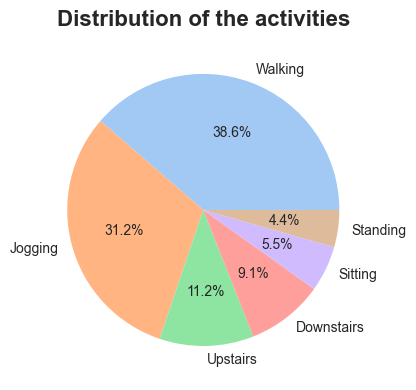

In [10]:
# distribution of activities
colors = sns.color_palette('pastel')[0:6]
data['activity'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.ylabel('')
plt.title('Distribution of the activities')
plt.show()

min_samples=544
max_samples=17622


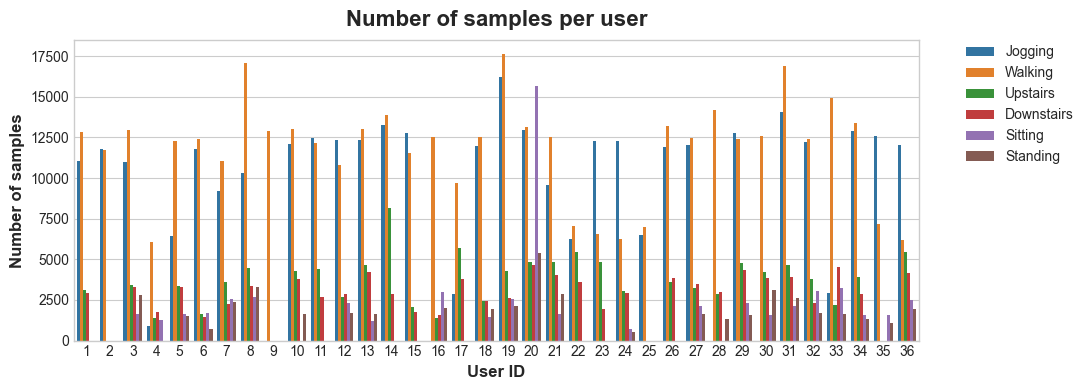

In [11]:
# number of samples per user using seaborn
sns.countplot(x='user_id', data=data, hue='activity')
# sort x-axis
plt.xticks(rotation=0)

# location of legend outside plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# min number of samples per user per activity
min_samples = data.groupby(['user_id', 'activity']).size().min()
print(f'{min_samples=}')

# max number of samples per user per activity
max_samples = data.groupby(['user_id', 'activity']).size().max()
print(f'{max_samples=}')

plt.ylabel('Number of samples')
plt.xlabel('User ID')
plt.title('Number of samples per user')
plt.show()

In [12]:
# group by timestamp and activity
data_grouped = data[['timestamp', 'activity', 'x', 'y', 'z']].groupby(['timestamp', 'activity']).mean()
data_grouped.reset_index(drop=False, inplace=True)

data_grouped

,timestamp,activity,x,y,z
0,0,Downstairs,0.00,0.000000,0.000000
1,0,Jogging,0.00,0.000501,0.000501
2,0,Standing,0.00,0.000000,0.000000
3,0,Upstairs,0.00,0.000000,0.000000
4,0,Walking,0.00,0.026707,0.026707
...,...,...,...,...,...
1022380,9999832349000,Walking,-5.98,11.840000,11.840000
1022381,9999882368000,Walking,-5.75,8.310000,8.310000
1022382,999992259000,Sitting,5.43,2.560000,2.560000
1022383,9999932325000,Walking,-7.97,5.130000,5.130000


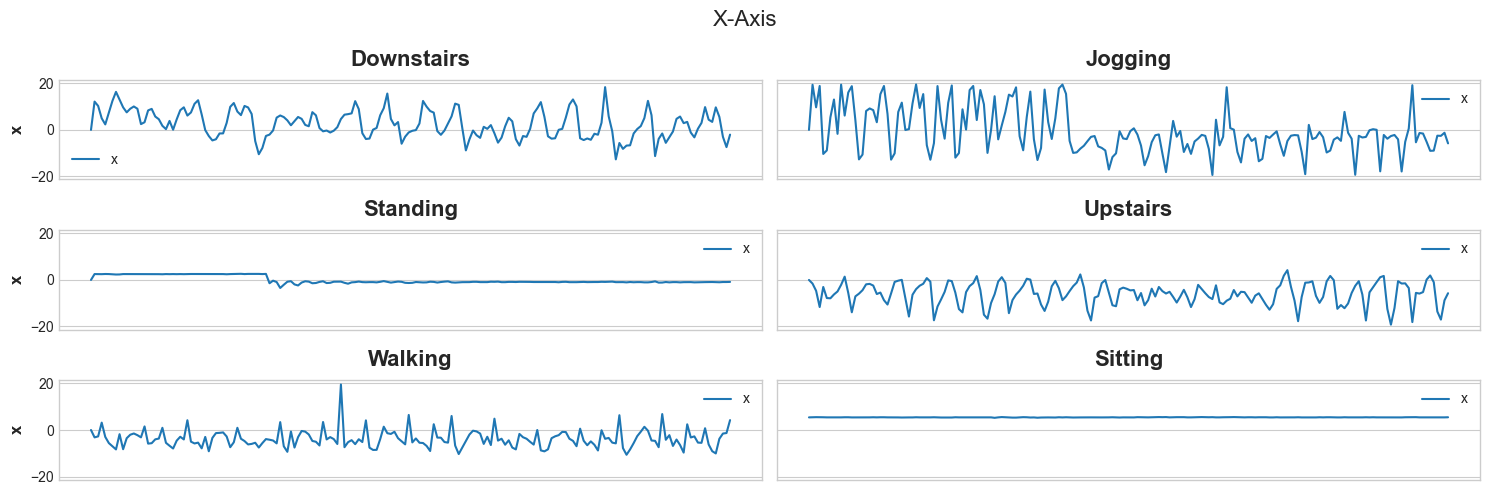

In [13]:
# plot trend of x for each activity in subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 5), sharey=True)
fig.suptitle('X-Axis', fontsize=16)
for i, activity in enumerate(data_grouped['activity'].unique()):
    data_grouped[data_grouped['activity']==activity][:180].plot(x='timestamp', y='x', ax=ax[i//2, i%2], title=activity)
    ax[i//2, i%2].set_xlabel('')
    ax[i//2, i%2].set_ylabel('x')
    ax[i//2, i%2].set_title(activity)
plt.setp(ax, xticks=[])
plt.tight_layout()
plt.show()

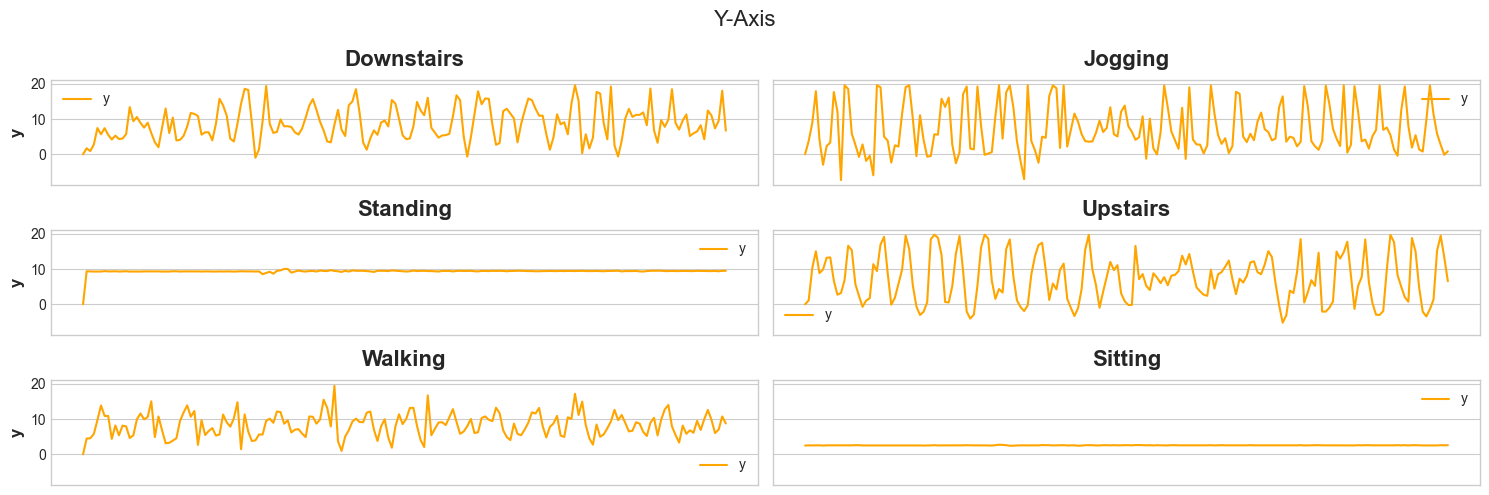

In [14]:
# plot trend of x for each activity in subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Y-Axis', fontsize=16)
for i, activity in enumerate(data_grouped['activity'].unique()):
    data_grouped[data_grouped['activity']==activity][:180].plot(x='timestamp', y='y', ax=ax[i//2, i%2], title=activity, color='orange')
    ax[i//2, i%2].set_xlabel('')
    ax[i//2, i%2].set_ylabel('y')
    ax[i//2, i%2].set_title(activity)
# remove x-ticks
plt.setp(ax, xticks=[])
plt.tight_layout()
plt.show()

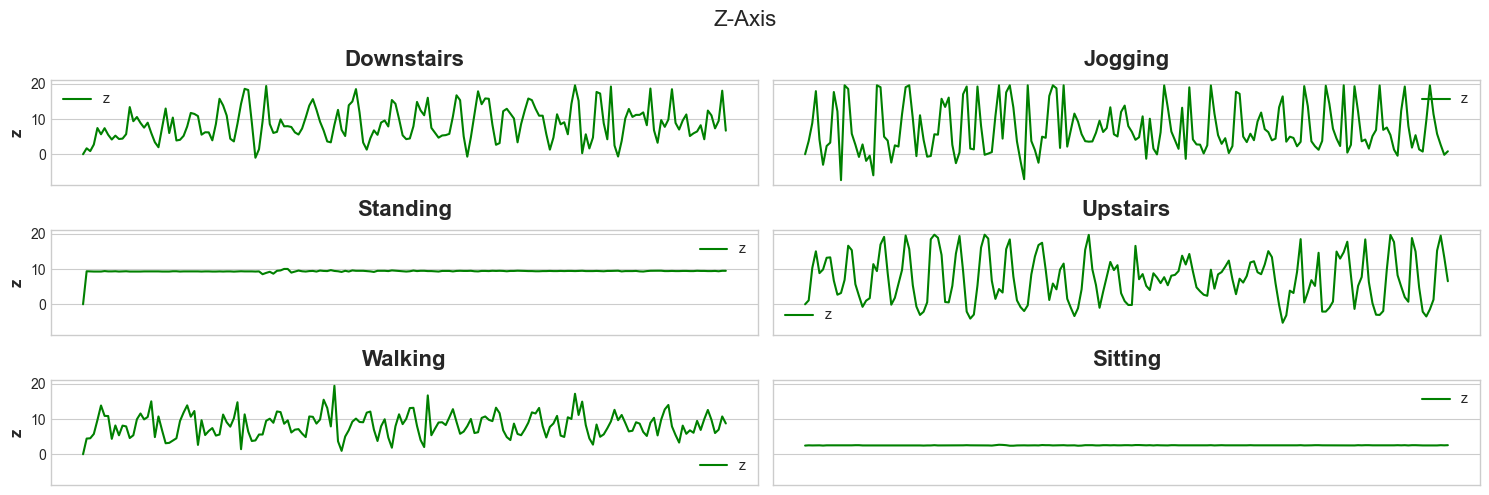

In [15]:
# plot trend of x for each activity in subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Z-Axis', fontsize=16)
for i, activity in enumerate(data_grouped['activity'].unique()):
    data_grouped[data_grouped['activity']==activity][:180].plot(x='timestamp', y='z', ax=ax[i//2, i%2], title=activity, color='green')
    ax[i//2, i%2].set_xlabel('')
    ax[i//2, i%2].set_ylabel('z')
    ax[i//2, i%2].set_title(activity)
# remove x-ticks
plt.setp(ax, xticks=[])

plt.tight_layout()
plt.show()

# Save transformed data

In [16]:
# save data as csv
data.to_csv('data/transformed/transformed_data.csv', index=False)